In [2]:
## Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
df = pd.read_csv('D:/Datasets/funcionarios.csv',sep=';')

In [20]:
# Apresentação dos dados
df.head(1)

,CODPESSOA,IDADE,TEMPODECASA,SALARIO,AREA,SITUACAO
0,188,46,26,18923,3,1


In [5]:
# Características do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CHAPA        698 non-null    int64 
 1   CODPESSOA    698 non-null    int64 
 2   NOME         698 non-null    object
 3   IDADE        698 non-null    int64 
 4   TEMPODECASA  698 non-null    int64 
 5   SALARIO      698 non-null    int64 
 6   AREA         698 non-null    int64 
 7   SITUACAO     698 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 43.8+ KB


In [6]:
# Exclusão de dados não utilizados
df = df.drop(columns=["CHAPA","NOME"], axis=1)

In [7]:
# Contagem de dados nulos
df.isnull().sum()

CODPESSOA      0
IDADE          0
TEMPODECASA    0
SALARIO        0
AREA           0
SITUACAO       0
dtype: int64

In [8]:
# Descrição inicial dos dados
df.describe()

,CODPESSOA,IDADE,TEMPODECASA,SALARIO,AREA,SITUACAO
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4878.505731,37.849570,8.406877,4662.276504,2.855301,0.638968
std,1860.499112,9.688343,6.571803,7979.668900,1.599132,0.480644
min,5.000000,18.000000,0.000000,588.000000,1.000000,0.000000
25%,4707.250000,31.000000,4.000000,1958.000000,2.000000,0.000000
50%,5517.000000,37.000000,7.000000,2808.500000,2.000000,1.000000
75%,6092.750000,44.000000,11.000000,4287.000000,3.000000,1.000000
max,6844.000000,69.000000,34.000000,99414.000000,9.000000,1.000000


Text(0.5, 1.0, 'Funcionários x Área')

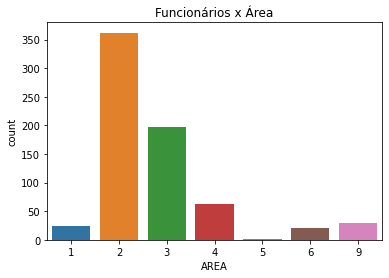

In [9]:
# Funcionários por área
sns.countplot(x='AREA', data=df)
plt.title('Funcionários x Área')

<AxesSubplot:>

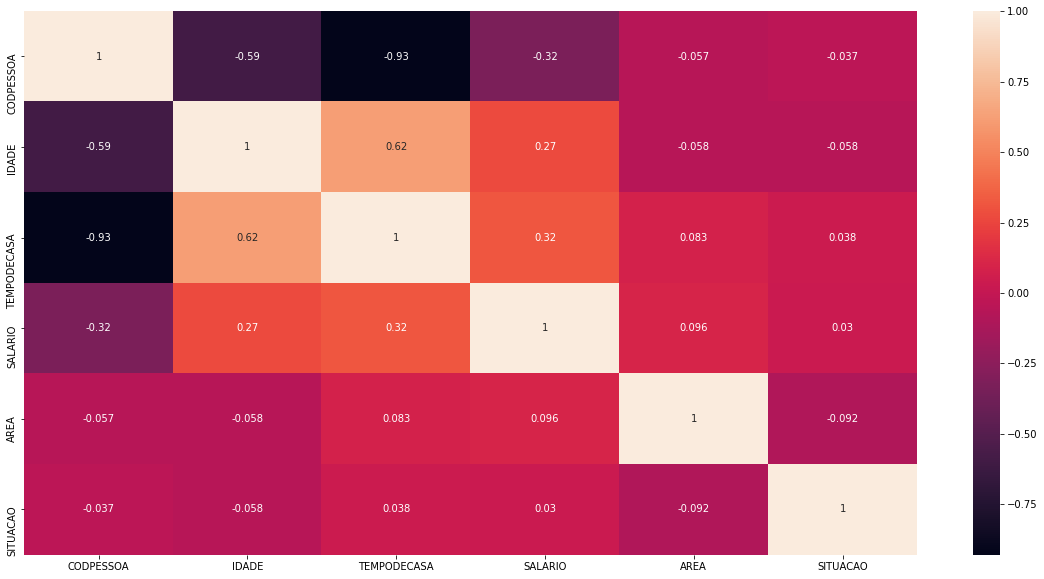

In [10]:
# Correlação de variáveis
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True)

<AxesSubplot:xlabel='IDADE'>

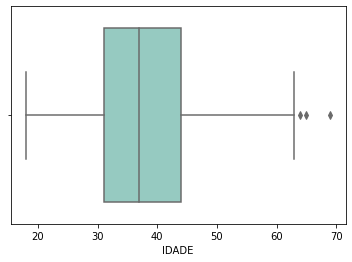

In [11]:
# Distribuição de faixa etária
sns.boxplot(x="IDADE", data=df, palette="Set3")

<AxesSubplot:xlabel='SALARIO'>

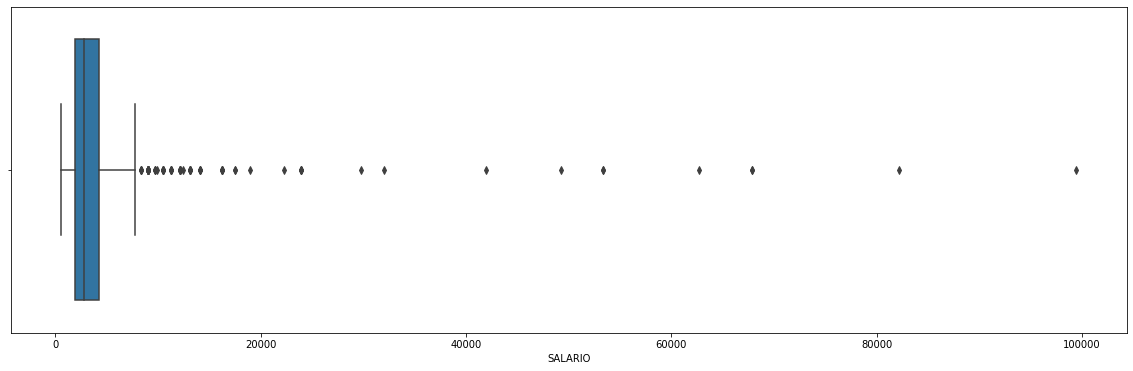

In [12]:
# Distribuição Salarial
plt.figure(figsize=(20,6))
sns.boxplot(x="SALARIO", data=df)

Text(0.5, 1.0, 'Tempo de casa dos funcionários ativos')

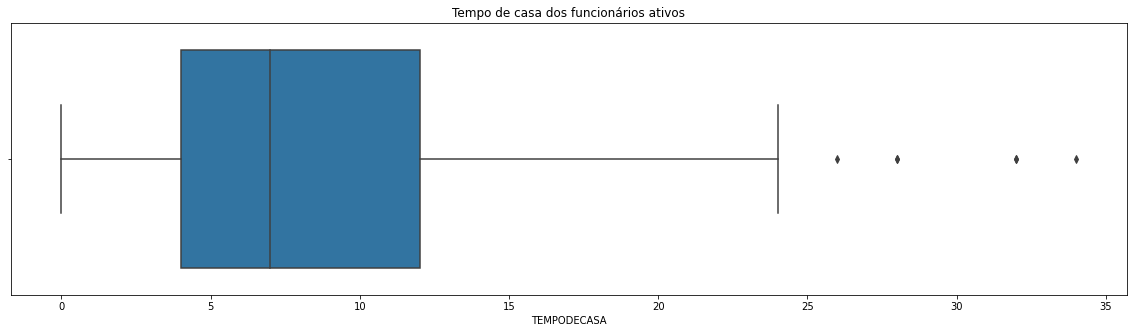

In [13]:
# Tempo de casa dos colaboradores ativos
df_ativos = df[df["SITUACAO"] == 1]
df_ativos.count()
plt.figure(figsize=(20,5))
sns.boxplot(x="TEMPODECASA", data=df_ativos)
plt.title('Tempo de casa dos funcionários ativos')

In [14]:
# Normalização de dados
x = df_ativos.values # retorna um numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_ativos_n = pd.DataFrame(x_scaled, columns=df.columns)

df_ativos.head()

,CODPESSOA,IDADE,TEMPODECASA,SALARIO,AREA,SITUACAO
0,188,46,26,18923,3,1
1,208,54,24,14053,3,1
2,3217,44,16,62647,3,1
3,3894,36,16,3693,3,1
4,4127,37,15,8987,3,1


In [15]:
# Importando o KMeans
from sklearn.cluster import KMeans

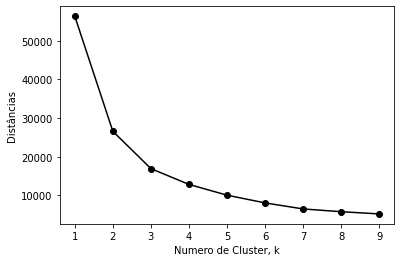

In [16]:
# Aplicando o curva do cootovelo para encontrar o número de clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Cria o obeto para modelo kmens para os testes
    model = KMeans(n_clusters=k)
    
    # Aplica nas componentes selecionadas (2 componentes)
    model.fit(df_ativos[['IDADE','TEMPODECASA']].iloc[:,:2])
    
    # Adiciona os valores para a distância (agitação)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Numero de Cluster, k')
plt.ylabel('Distâncias')
plt.xticks(ks)
plt.show()

In [17]:
# Observação em cima dos dados de tempo de casa e salario
segmentacao = df_ativos[['IDADE','TEMPODECASA']].iloc[:,:].values

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(segmentacao)
y_kmeans = kmeans.predict(segmentacao)

Text(0.5, 1.0, 'Segmentação de funcionários - Idade x Tempo de casa')

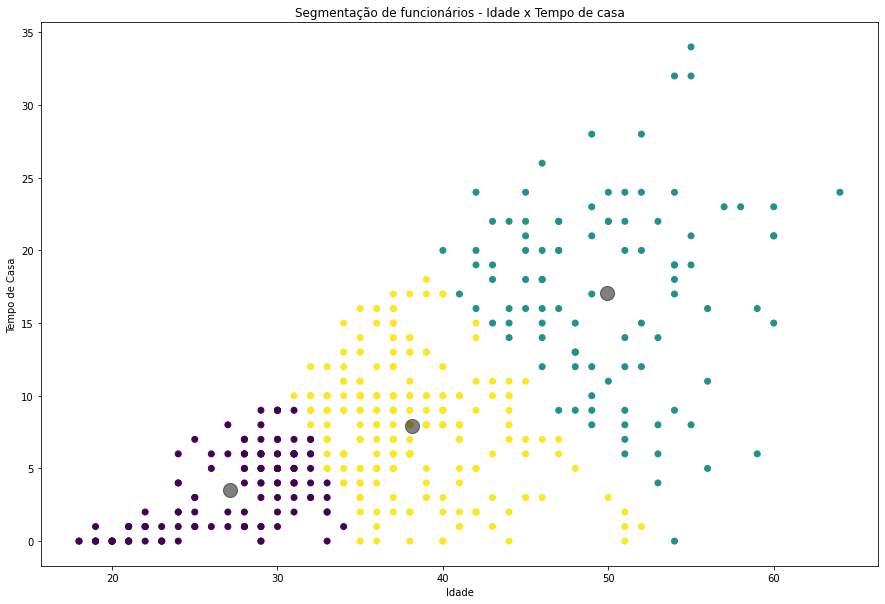

In [19]:
# Gráfico clusterizado
plt.figure(figsize = (15 , 10) ) #define o tamanho da figura

plt.scatter(segmentacao[:, 0], segmentacao[:, 1], c=y_kmeans, cmap='viridis') # constrói o gráfco de dispersão com os grupos
centers = kmeans.cluster_centers_ # encontra os centros de cada um dos grupos
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) # realiza o plot de cada um dos grupos
plt.xlabel("Idade")  # adiciona o label para o eixo X
plt.ylabel("Tempo de Casa") # adiciona o label para o eixo Y
plt.title("Segmentação de funcionários - Idade x Tempo de casa") # adiciona o título